In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
from pathlib import Path

def create_image_dataset(data_folder):
    """
    Create a pandas DataFrame with image paths and labels from subfolders.
    
    Parameters:
    data_folder (str): Path to the main data folder containing subfolders with images
    
    Returns:
    pandas.DataFrame: DataFrame with columns 'image_path' and 'label'
    """
    image_paths = []
    labels = []
    
    # Get the absolute path of the data folder
    data_path = Path(data_folder)
    
    # Iterate through each subfolder (label)
    for label_folder in data_path.iterdir():
        if label_folder.is_dir():
            label_name = label_folder.name
            
            # Get all image files in the subfolder
            for image_file in label_folder.iterdir():
                if image_file.is_file() and image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
                    image_paths.append(str(image_file.absolute()))
                    labels.append(label_name)
    
    # Create DataFrame
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    })
    
    return df

In [4]:
# Example usage
data_folder = '../data'
df = create_image_dataset(data_folder)
print("Dataset created successfully!")
print(f"Total images: {len(df)}")
print(f"Labels: {df['label'].unique()}")
print("\nFirst few rows:")
print(df.head())

Dataset created successfully!
Total images: 300
Labels: ['drivers_license' 'passport' 'invoice']

First few rows:
                                          image_path            label
0  /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
1  /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
2  /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
3  /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
4  /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license


In [5]:
# Display dataset information
print("Dataset Summary:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())
print(f"\nSample of the dataset:")
print(df)


Dataset Summary:
Shape: (300, 2)
Columns: ['image_path', 'label']

Label distribution:
label
drivers_license    100
passport           100
invoice            100
Name: count, dtype: int64

Sample of the dataset:
                                            image_path            label
0    /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
1    /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
2    /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
3    /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
4    /Users/mohamedaminemrabet/Documents/Confidenti...  drivers_license
..                                                 ...              ...
295  /Users/mohamedaminemrabet/Documents/Confidenti...          invoice
296  /Users/mohamedaminemrabet/Documents/Confidenti...          invoice
297  /Users/mohamedaminemrabet/Documents/Confidenti...          invoice
298  /Users/mohamedaminemrabet/Documents/Confidenti...          invo

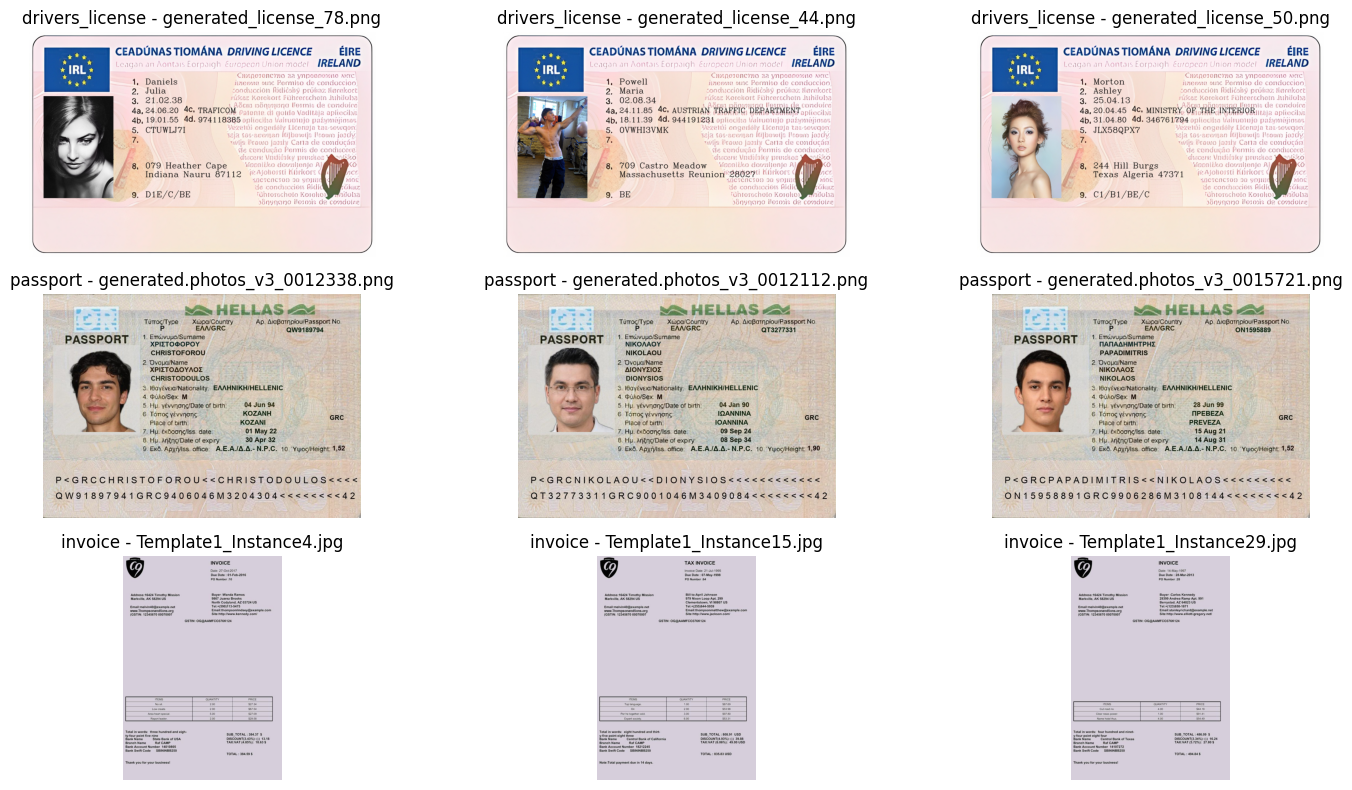

In [6]:
from PIL import Image

def display_sample_images(df, n_samples=3):
    """
    Display sample images from the dataset.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with image paths and labels
    n_samples (int): Number of samples to display per label
    """
    fig, axes = plt.subplots(3, n_samples, figsize=(15, 8))
    axes = axes.ravel()
    
    sample_idx = 0
    for label in df['label'].unique():
        label_samples = df[df['label'] == label].head(n_samples)
        
        for idx, (_, row) in enumerate(label_samples.iterrows()):
            try:
                img = Image.open(row['image_path'])
                axes[sample_idx].imshow(img)
                axes[sample_idx].set_title(f"{row['label']} - {Path(row['image_path']).name}")
                axes[sample_idx].axis('off')
                sample_idx += 1
            except Exception as e:
                print(f"Error loading image {row['image_path']}: {e}")
    
    # Hide unused subplots
    for idx in range(sample_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)


In [7]:
def analyze_pixel_distribution(image_path, title="Pixel Distribution"):
    """
    Analyze and display the pixel distribution of an image.
    
    Parameters:
    image_path (str): Path to the image file
    title (str): Title for the plot
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Reshape to get all pixels
    pixels = img_array.reshape(-1, 3)
    
    # Create a figure with subplots for RGB channels
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Display the original image
    axes[0, 0].imshow(img)
    axes[0, 0].set_title(f"Original Image\n{Path(image_path).name}")
    axes[0, 0].axis('off')
    
    # Analyze each RGB channel
    colors = ['Red', 'Green', 'Blue']
    for i, color in enumerate(colors):
        channel_data = pixels[:, i]
        
        # Create histogram
        axes[0, 1].hist(channel_data, bins=256, alpha=0.7, 
                       color=color.lower(), label=f'{color} Channel')
    
    axes[0, 1].set_title('RGB Channel Distribution')
    axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Analyze color distribution (dominant colors)
    # Sample a subset of pixels for efficiency
    sample_pixels = pixels[::100]  # Sample every 100th pixel
    
    # Count unique colors (approximate by rounding to nearest 10)
    rounded_pixels = (sample_pixels // 10) * 10
    unique_colors, counts = np.unique(rounded_pixels, axis=0, return_counts=True)
    
    # Sort by frequency
    sorted_indices = np.argsort(counts)[::-1]
    top_colors = unique_colors[sorted_indices][:20]  # Top 20 colors
    top_counts = counts[sorted_indices][:20]
    
    # Create color bars
    color_bars = [f"RGB({r},{g},{b})" for r, g, b in top_colors]
    
    axes[1, 0].barh(range(len(color_bars)), top_counts)
    axes[1, 0].set_yticks(range(len(color_bars)))
    axes[1, 0].set_yticklabels(color_bars, fontsize=8)
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].set_title('Top 20 Dominant Colors')
    axes[1, 0].invert_yaxis()
    
    # Create a color palette visualization
    color_palette = np.array(top_colors).reshape(1, -1, 3)
    axes[1, 1].imshow(color_palette, aspect='auto')
    axes[1, 1].set_title('Color Palette (Top 20)')
    axes[1, 1].set_xticks(range(0, len(top_colors), 2))
    axes[1, 1].set_xticklabels([f"RGB({r},{g},{b})" for r, g, b in top_colors[::2]], 
                               rotation=45, ha='right', fontsize=8)
    axes[1, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nImage Statistics for {Path(image_path).name}:")
    print(f"Image size: {img.size}")
    print(f"Mode: {img.mode}")
    print(f"Total pixels: {len(pixels)}")
    print(f"Mean RGB values: R={pixels[:, 0].mean():.1f}, G={pixels[:, 1].mean():.1f}, B={pixels[:, 2].mean():.1f}")
    print(f"Std RGB values: R={pixels[:, 0].std():.1f}, G={pixels[:, 1].std():.1f}, B={pixels[:, 2].std():.1f}")


In [8]:
# label
# drivers_license    100
# passport           100
# invoice            100

Analyzing passport image...


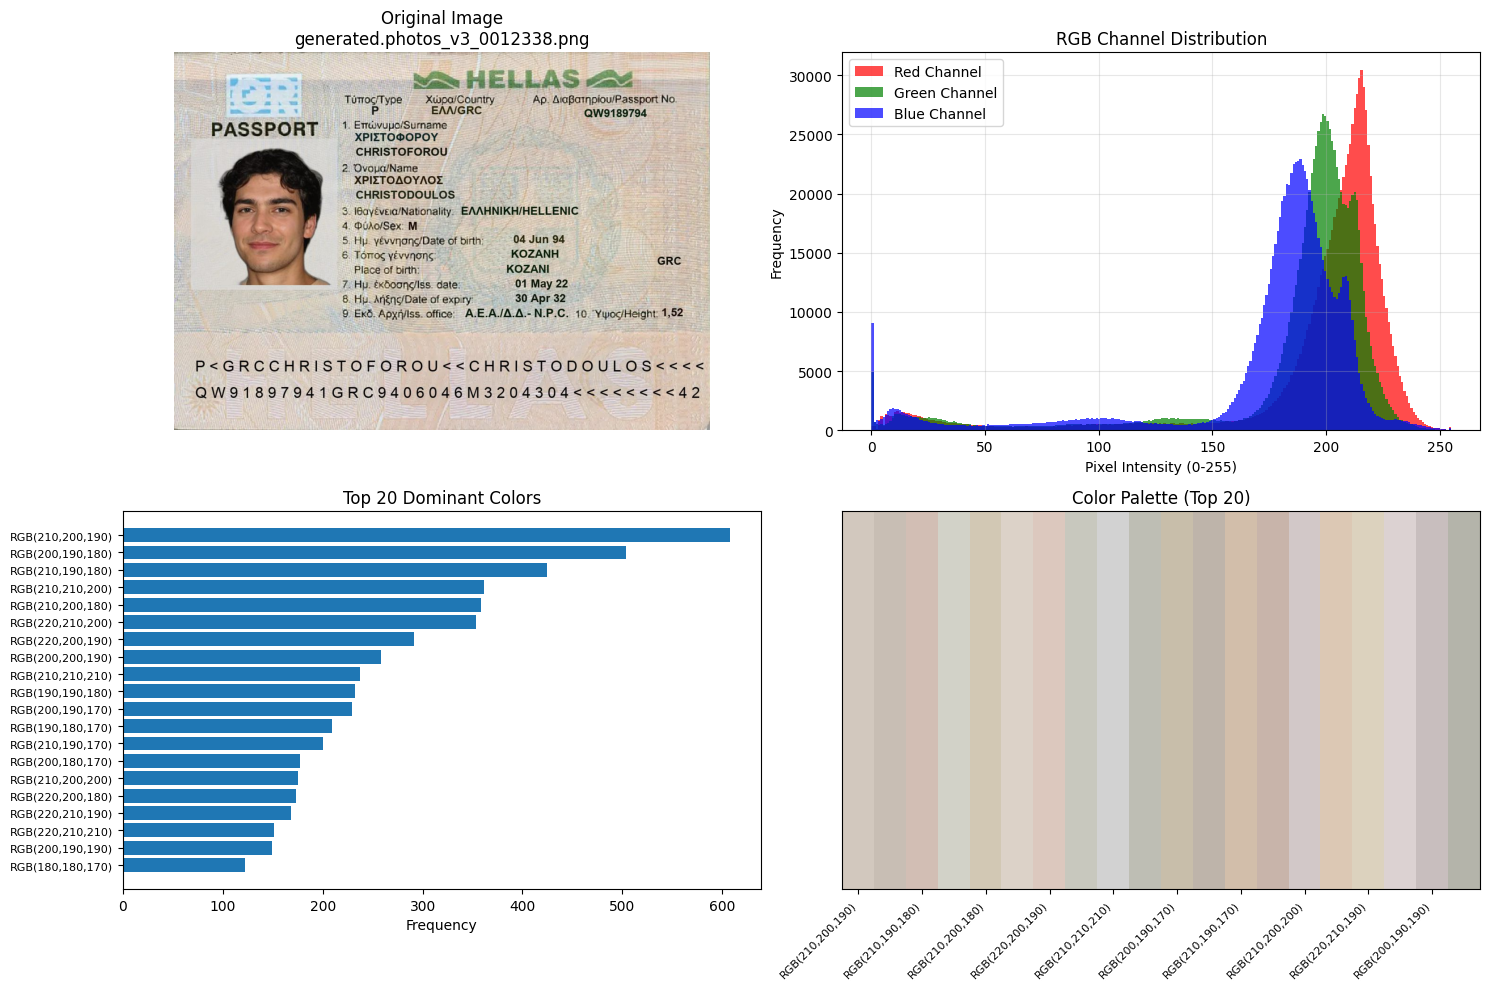


Image Statistics for generated.photos_v3_0012338.png:
Image size: (1136, 803)
Mode: RGB
Total pixels: 912208
Mean RGB values: R=194.8, G=185.4, B=173.9
Std RGB values: R=47.8, G=46.7, B=48.1


In [9]:
passport_image = df[df['label'] == 'passport']['image_path'].iloc[0]
drivers_license_image = df[df['label'] == 'drivers_license']['image_path'].iloc[1]
invoice_image = df[df['label'] == 'invoice']['image_path'].iloc[1]

print("Analyzing passport image...")
analyze_pixel_distribution(passport_image, "passport Image Analysis")


Analyzing drivers_license image...


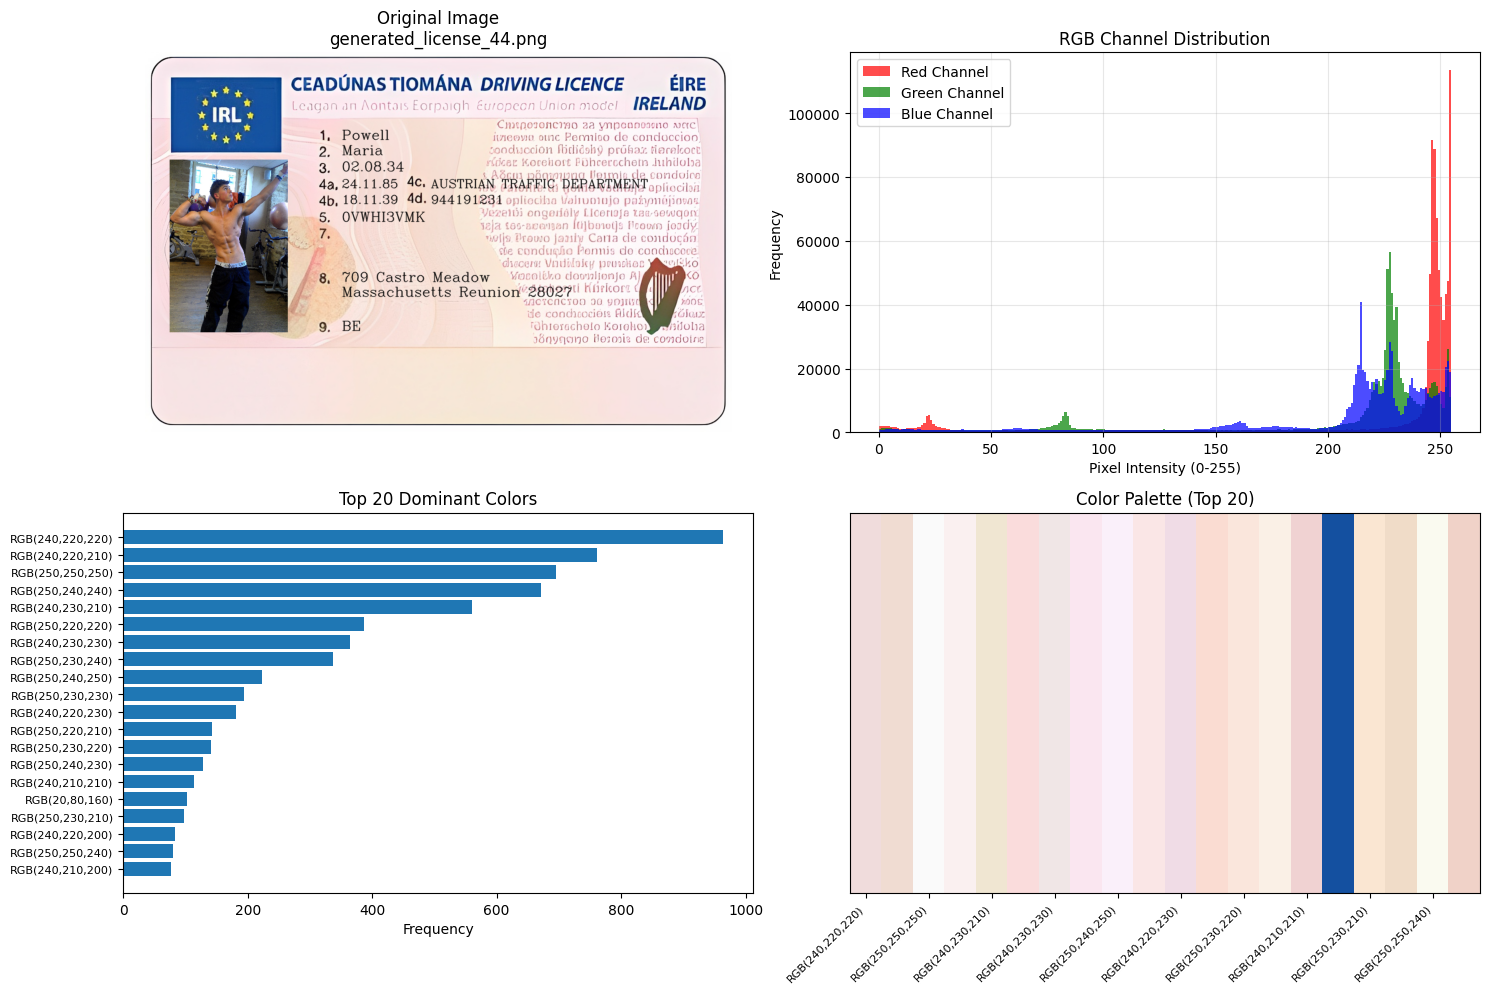


Image Statistics for generated_license_44.png:
Image size: (1192, 772)
Mode: RGB
Total pixels: 920224
Mean RGB values: R=216.8, G=203.5, B=203.6
Std RGB values: R=71.0, G=62.2, B=58.1


In [10]:
print("\n" + "="*60)
print("Analyzing drivers_license image...")
analyze_pixel_distribution(drivers_license_image, "drivers_license Image Analysis")



Analyzing invoice image...


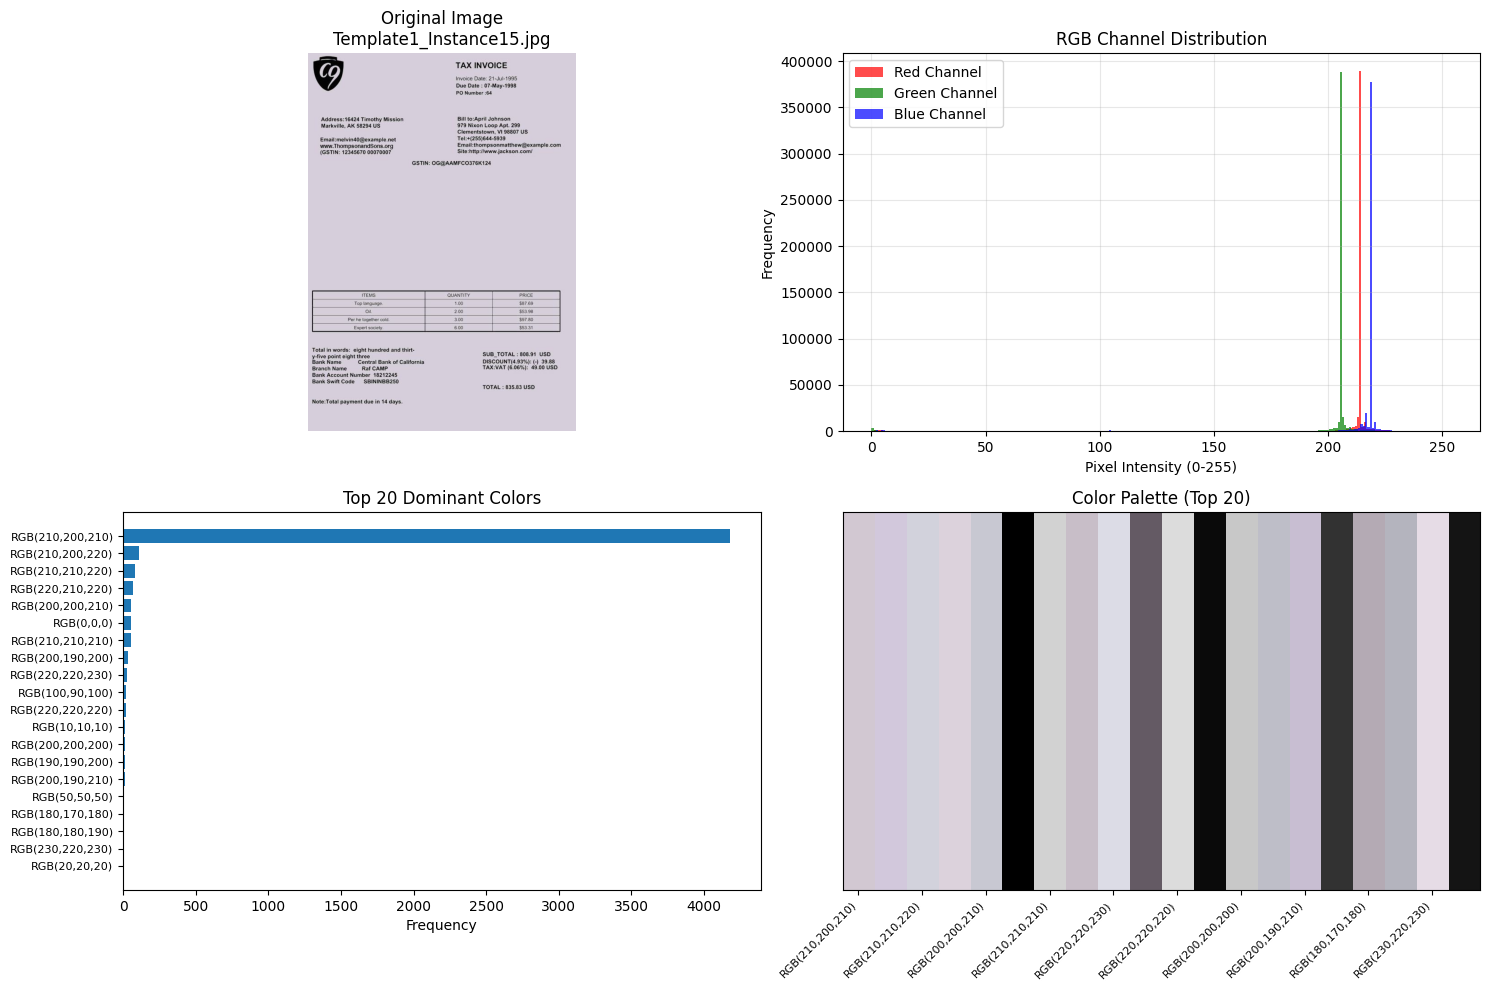


Image Statistics for Template1_Instance15.jpg:
Image size: (595, 841)
Mode: RGB
Total pixels: 500395
Mean RGB values: R=205.2, G=197.8, B=209.7
Std RGB values: R=36.9, G=35.9, B=37.6


In [11]:
print("\n" + "="*60)
print("Analyzing invoice image...")
analyze_pixel_distribution(invoice_image, "invoice Image Analysis")


In [12]:
def extract_color_features(image_path, n_colors=10):
    """
    Extract dominant color features from an image.
    
    Parameters:
    image_path (str): Path to the image file
    n_colors (int): Number of dominant colors to extract
    
    Returns:
    dict: Dictionary containing color features
    """
    # Load the image
    img = Image.open(image_path)
    
    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(img)
    pixels = img_array.reshape(-1, 3)
    
    # Sample pixels for efficiency
    sample_pixels = pixels[::50]  # Sample every 50th pixel
    
    # Round to nearest 20 to group similar colors
    rounded_pixels = (sample_pixels // 20) * 20
    unique_colors, counts = np.unique(rounded_pixels, axis=0, return_counts=True)
    
    # Sort by frequency and get top colors
    sorted_indices = np.argsort(counts)[::-1]
    top_colors = unique_colors[sorted_indices][:n_colors]
    top_counts = counts[sorted_indices][:n_colors]
    
    # Calculate color ratios
    total_pixels = len(sample_pixels)
    color_ratios = top_counts / total_pixels
    
    # Calculate mean RGB values
    mean_rgb = np.mean(pixels, axis=0)
    
    # Calculate RGB standard deviations
    std_rgb = np.std(pixels, axis=0)
    
    # Calculate color diversity (entropy)
    color_entropy = -np.sum(color_ratios * np.log2(color_ratios + 1e-10))
    
    return {
        'top_colors': top_colors,
        'color_ratios': color_ratios,
        'mean_rgb': mean_rgb,
        'std_rgb': std_rgb,
        'color_entropy': color_entropy,
        'dominant_color': top_colors[0] if len(top_colors) > 0 else np.array([0, 0, 0])
    }

In [13]:
# Extract features from all existing images
print("Extracting color features from existing images...")
passport_features = []
drivers_license_features = []
invoice_features = []

for _, row in df.iterrows():
    features = extract_color_features(row['image_path'])
    if row['label'] == 'passport':
        passport_features.append(features)
    elif row['label'] == 'drivers_license':
        drivers_license_features.append(features)
    else: 
        invoice_features.append(features)
print(f"Extracted features from {len(passport_features)} passport images and {len(drivers_license_features)} drivers_license images and {len(invoice_features)} invoice images")


Extracting color features from existing images...
Extracted features from 100 passport images and 100 drivers_license images and 100 invoice images


In [14]:
def create_color_classifier(passport_features, drivers_license_features, invoice_features):
    """
    Create a color-based classifier using the extracted features.
    
    Parameters:
    passport_features (list): List of color features from passport images
    drivers_license_features (list): List of color features from drivers_license images
    
    Returns:
    dict: Classifier with learned patterns
    """
    # Calculate average features for each class
    passport_mean_rgb = np.mean([f['mean_rgb'] for f in passport_features], axis=0)
    passport_std_rgb = np.mean([f['std_rgb'] for f in passport_features], axis=0)
    passport_mean_entropy = np.mean([f['color_entropy'] for f in passport_features])
    
    drivers_license_mean_rgb = np.mean([f['mean_rgb'] for f in drivers_license_features], axis=0)
    drivers_license_std_rgb = np.mean([f['std_rgb'] for f in drivers_license_features], axis=0)
    drivers_license_mean_entropy = np.mean([f['color_entropy'] for f in drivers_license_features])

    invoice_mean_rgb = np.mean([f['mean_rgb'] for f in invoice_features], axis=0)
    invoice_std_rgb = np.mean([f['std_rgb'] for f in invoice_features], axis=0)
    invoice_mean_entropy = np.mean([f['color_entropy'] for f in invoice_features])
    
    # Get common dominant colors for each class
    passport_dominant_colors = []
    drivers_license_dominant_colors = []
    invoice_dominant_colors = []
    
    for f in passport_features:
        passport_dominant_colors.extend(f['top_colors'][:3])  # Top 3 colors
    
    for f in drivers_license_features:
        drivers_license_dominant_colors.extend(f['top_colors'][:3])  # Top 3 colors

    for f in invoice_features:
        invoice_dominant_colors.extend(f['top_colors'][:3])  # Top 3 colors
    
    # Find unique dominant colors for each class
    passport_unique_colors = np.unique(np.array(passport_dominant_colors), axis=0)
    drivers_license_unique_colors = np.unique(np.array(drivers_license_dominant_colors), axis=0)
    invoice_unique_colors = np.unique(np.array(invoice_dominant_colors), axis=0)
    
    classifier = {
        'passport': {
            'mean_rgb': passport_mean_rgb,
            'std_rgb': passport_std_rgb,
            'mean_entropy': passport_mean_entropy,
            'dominant_colors': passport_unique_colors
        },
        'drivers_license': {
            'mean_rgb': drivers_license_mean_rgb,
            'std_rgb': drivers_license_std_rgb,
            'mean_entropy': drivers_license_mean_entropy,
            'dominant_colors': drivers_license_unique_colors
        },
        'invoice': {
            'mean_rgb': invoice_mean_rgb,
            'std_rgb': invoice_std_rgb,
            'mean_entropy': invoice_mean_entropy,
            'dominant_colors': invoice_unique_colors
        }
    }
    
    return classifier

In [15]:
# Create the classifier
classifier = create_color_classifier(passport_features, drivers_license_features, invoice_features)

print("Color-based classifier created!")
print("\npassport Class Characteristics:")
print(f"Mean RGB: {classifier['passport']['mean_rgb']}")
print(f"Mean Entropy: {classifier['passport']['mean_entropy']:.3f}")
print(f"Number of dominant colors: {len(classifier['passport']['dominant_colors'])}")

print("\ndrivers_license Class Characteristics:")
print(f"Mean RGB: {classifier['drivers_license']['mean_rgb']}")
print(f"Mean Entropy: {classifier['drivers_license']['mean_entropy']:.3f}")
print(f"Number of dominant colors: {len(classifier['drivers_license']['dominant_colors'])}")

print("\nInvoice Class Characteristics:")
print(f"Mean RGB: {classifier['invoice']['mean_rgb']}")
print(f"Mean Entropy: {classifier['invoice']['mean_entropy']:.3f}")
print(f"Number of dominant colors: {len(classifier['invoice']['dominant_colors'])}")


Color-based classifier created!

passport Class Characteristics:
Mean RGB: [195.22609748 185.60864789 174.04099074]
Mean Entropy: 2.719
Number of dominant colors: 4

drivers_license Class Characteristics:
Mean RGB: [219.93273254 205.96927436 205.55885229]
Mean Entropy: 2.189
Number of dominant colors: 3

Invoice Class Characteristics:
Mean RGB: [205.37981704 197.96713882 209.91227846]
Mean Entropy: 0.825
Number of dominant colors: 4


In [16]:
def classify_image(image_path, classifier):
    """
    Classify an image as passport or drivers_license based on color features.
    
    Parameters:
    image_path (str): Path to the image file
    classifier (dict): Trained color classifier
    
    Returns:
    tuple: (predicted_label, confidence_score, detailed_scores)
    """
    # Extract features from the image
    features = extract_color_features(image_path)
    
    # Calculate similarity scores for each class
    passport_score = 0
    drivers_license_score = 0
    invoice_score = 0
    
    # RGB mean similarity (lower distance = higher similarity)
    passport_rgb_distance = np.linalg.norm(features['mean_rgb'] - classifier['passport']['mean_rgb'])
    drivers_license_rgb_distance = np.linalg.norm(features['mean_rgb'] - classifier['drivers_license']['mean_rgb'])
    invoice_rgb_distance = np.linalg.norm(features['mean_rgb'] - classifier['invoice']['mean_rgb'])
    
    # Normalize distances (invert so higher = better)
    passport_score += 1 / (1 + passport_rgb_distance)
    drivers_license_score += 1 / (1 + drivers_license_rgb_distance)
    invoice_score += 1 / (1 + invoice_rgb_distance)
    
    # Entropy similarity
    passport_entropy_diff = abs(features['color_entropy'] - classifier['passport']['mean_entropy'])
    drivers_license_entropy_diff = abs(features['color_entropy'] - classifier['drivers_license']['mean_entropy'])
    invoice_entropy_diff = abs(features['color_entropy'] - classifier['invoice']['mean_entropy'])
    
    passport_score += 1 / (1 + passport_entropy_diff)
    drivers_license_score += 1 / (1 + drivers_license_entropy_diff)
    invoice_score += 1 / (1 + invoice_entropy_diff)
    
    # Dominant color similarity
    passport_color_matches = 0
    drivers_license_color_matches = 0
    invoice_color_matches = 0
    
    for dominant_color in features['top_colors'][:5]:  # Check top 5 colors
        # Check similarity with passport dominant colors
        for passport_color in classifier['passport']['dominant_colors']:
            if np.linalg.norm(dominant_color - passport_color) < 30:  # Threshold for color similarity
                passport_color_matches += 1
                break
        
        # Check similarity with drivers_license dominant colors
        for drivers_license_color in classifier['drivers_license']['dominant_colors']:
            if np.linalg.norm(dominant_color - drivers_license_color) < 30:  # Threshold for color similarity
                drivers_license_color_matches += 1
                break
        
        # Check similarity with invoice dominant colors
        for invoice_color in classifier['invoice']['dominant_colors']:
            if np.linalg.norm(dominant_color - invoice_color) < 30:  # Threshold for color similarity
                invoice_color_matches += 1
                break
    
    passport_score += passport_color_matches * 0.2
    drivers_license_score += drivers_license_color_matches * 0.2
    invoice_score += invoice_color_matches * 0.2
    # Determine prediction
    scores = {
        'passport': passport_score,
        'drivers_license': drivers_license_score,
        'invoice': invoice_score
    }
    predicted_label = max(scores, key=scores.get)
    total_score = sum(scores.values())
    confidence = scores[predicted_label] / total_score
    
    detailed_scores = {
        'passport_score': passport_score,
        'drivers_license_score': drivers_license_score,
        'invoice_score': invoice_score,
        'passport_rgb_distance': passport_rgb_distance,
        'drivers_license_rgb_distance': drivers_license_rgb_distance,
        'invoice_rgb_distance': invoice_rgb_distance,
        'passport_color_matches': passport_color_matches,
        'drivers_license_color_matches': drivers_license_color_matches,
        'invoice_color_matches': invoice_color_matches,
        'passport_entropy_diff': passport_entropy_diff,
        'drivers_license_entropy_diff': drivers_license_entropy_diff,
        'invoice_entropy_diff': invoice_entropy_diff
    }
    
    return predicted_label, confidence, detailed_scores

In [65]:
# Test the classifier on existing images
print("Testing classifier on existing images...")
print("=" * 60)

correct_predictions = 0
total_predictions = len(df)

for _, row in df.iterrows():
    predicted_label, confidence, scores = classify_image(row['image_path'], classifier)
    actual_label = row['label']
    is_correct = predicted_label == actual_label
    
    if is_correct:
        correct_predictions += 1

    print(f"Image: {Path(row['image_path']).name}")
    print(f"Actual: {actual_label}, Predicted: {predicted_label}, Confidence: {confidence:.3f}")
    print(f"passport Score: {scores['passport_score']:.3f}, drivers_license Score: {scores['drivers_license_score']:.3f}, invoice Score: {scores['invoice_score']:.3f}")
    print(f"Result: {'✓ CORRECT' if is_correct else '✗ INCORRECT'}")
    print("-" * 40)

accuracy = correct_predictions / total_predictions
print(f"\nOverall Accuracy: {accuracy:.2%} ({correct_predictions}/{total_predictions})")


Testing classifier on existing images...
Image: generated_license_78.png
Actual: drivers_license, Predicted: drivers_license, Confidence: 0.576
passport Score: 0.723, drivers_license Score: 1.897, invoice Score: 0.673
Result: ✓ CORRECT
----------------------------------------
Image: generated_license_44.png
Actual: drivers_license, Predicted: drivers_license, Confidence: 0.590
passport Score: 0.666, drivers_license Score: 1.957, invoice Score: 0.694
Result: ✓ CORRECT
----------------------------------------
Image: generated_license_50.png
Actual: drivers_license, Predicted: drivers_license, Confidence: 0.583
passport Score: 0.651, drivers_license Score: 1.850, invoice Score: 0.673
Result: ✓ CORRECT
----------------------------------------
Image: generated_license_87.png
Actual: drivers_license, Predicted: drivers_license, Confidence: 0.580
passport Score: 0.691, drivers_license Score: 1.899, invoice Score: 0.687
Result: ✓ CORRECT
----------------------------------------
Image: generate

In [33]:
def classify_and_add_image(image_path, classifier, dataset_df, confidence_threshold=0.6):
    """
    Classify a new image and add it to the dataset if confidence is above threshold.
    
    Parameters:
    image_path (str): Path to the new image file
    classifier (dict): Trained color classifier
    dataset_df (pandas.DataFrame): Current dataset DataFrame
    confidence_threshold (float): Minimum confidence required to add to dataset
    
    Returns:
    tuple: (updated_dataframe, classification_result, was_added)
    """
    # Classify the image
    predicted_label, confidence, scores = classify_image(image_path, classifier)
    
    classification_result = {
        'image_path': image_path,
        'predicted_label': predicted_label,
        'confidence': confidence,
        'scores': scores
    }
    
    was_added = False
    
    # Check if confidence is above threshold
    if confidence >= confidence_threshold:
        # Add to dataset
        new_row = pd.DataFrame({
            'image_path': [image_path],
            'label': [predicted_label]
        })
        
        updated_df = pd.concat([dataset_df, new_row], ignore_index=True)
        was_added = True
        
        print(f"✓ Image added to dataset as '{predicted_label}' (confidence: {confidence:.3f})")
    else:
        updated_df = dataset_df.copy()
        print(f"✗ Image NOT added - confidence too low: {confidence:.3f} < {confidence_threshold}")
        print(f"  Predicted: {predicted_label}, but not confident enough")
    
    return updated_df, classification_result, was_added

def batch_classify_and_add_images(image_folder, classifier, dataset_df, confidence_threshold=0.6):
    """
    Classify and add multiple images from a folder.
    
    Parameters:
    image_folder (str): Path to folder containing new images
    classifier (dict): Trained color classifier
    dataset_df (pandas.DataFrame): Current dataset DataFrame
    confidence_threshold (float): Minimum confidence required to add to dataset
    
    Returns:
    tuple: (updated_dataframe, classification_results)
    """
    image_folder_path = Path(image_folder)
    updated_df = dataset_df.copy()
    classification_results = []
    
    # Find all image files in the folder
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(image_folder_path.glob(f"*{ext}"))
        image_files.extend(image_folder_path.glob(f"*{ext.upper()}"))
    
    print(f"Found {len(image_files)} images in {image_folder}")
    print("=" * 60)
    
    for image_file in image_files:
        print(f"\nProcessing: {image_file.name}")
        updated_df, result, was_added = classify_and_add_image(
            str(image_file), classifier, updated_df, confidence_threshold
        )
        classification_results.append(result)
    
    return updated_df, classification_results
